# Incident Blotter per Neighborhood

For the final project of determining the best neighborhood, under the overall metric of **safety**, I choose the submetric to be **incident hierarchy** for each neighborhood. The dataset I use is https://data.wprdc.org/dataset/police-incident-blotter.

In [2]:
# import packages
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# read in dataset
blotter = pd.read_csv("police_incident_blotter_data.csv")

In [4]:
blotter.shape[0]

2936

In [5]:
blotter.shape[1]

15

In [6]:
# help me determine which feature to look at
blotter.sample(10)

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
629,308595184,23049908,11,2023-04-05T12:10:00,"200 Block Climax St Pittsburgh, PA 15210",N,Beltzhoover,3,IDENTITY THEFT,4120 Identity Theft,1809.0,3.0,5.0,-80.004323,40.419427
146,306495137,23035600,10,2023-03-09T23:42:00,"1000 Block Liberty Ave Pittsburgh, PA 15222",Y,Central Business District,2,SIMPLE ASSAULT,2701 Simple Assault.,201.0,6.0,6.0,-79.994616,40.443419
30,306351618,23035005,0,2023-03-08T11:00:00,"800 Block East Ohio St Pittsburgh, PA 15212",N,East Allegheny,1,99,2709.1 Stalking Conduct or Repeatedly Acts Inc...,2304.0,1.0,1.0,-79.996711,40.454419
1590,306886228,23037777,0,2023-03-14T12:00:00,"100 Block Bausman St Pittsburgh, PA 15210",N,Knoxville,3,99,9999 9999 - (Misc. Incident):,3001.0,NaN,NaN,-79.987984,40.414463
968,307186513,23039642,10,2023-03-17T20:55:00,"600 Block Finland St Pittsburgh, PA 15219",Y,Upper Hill,2,TERRORISTIC THREATS,2701(a)(3) Simple Assault - Attempts by Physic...,506.0,6.0,3.0,-79.959062,40.456272
2177,-3646203196,23045406,0,2023-03-28T11:30:00,"West Liberty Ave & Pauline Ave Pittsburgh, PA ...",N,Brookline,6,99,9999 9999 - (Misc. Incident): A female driver ...,1917.0,4.0,5.0,-80.022174,40.401749
2441,308312421,23048045,0,2023-04-02T00:30:00,"1500 Block 5th Ave Pittsburgh, PA 15219",Y,Bluff,2,99,9999 9999 - (Misc. Incident):,103.0,6.0,3.0,-79.985025,40.438540
641,307650130,23042693,15,2023-03-23T12:00:00,"900 Block Freeport Rd Pittsburgh, PA",N,Lincoln-Lemington-Belmar,5,SALE OR TRANSFER OF FIREARMS,6111 Sale of Firearms.,1201.0,9.0,2.0,-79.892353,40.486119
2089,306387276,23035224,6,2023-03-08T20:20:00,"1100 Block Federal St N Pittsburgh, PA 15212",N,Central North Side,1,THEFT,3921 Theft by Unlawful Taking or Disposition.,2206.0,NaN,NaN,NaN,NaN
1869,307181550,23039094,14,2023-03-16T22:15:00,"600 Block 1st Ave Pittsburgh, PA 15219",Y,Spring Hill-City View,1,CRIM MISCHIEF,3304 Criminal Mischief. / 3928 Unauthorized Us...,2620.0,6.0,6.0,-79.996041,40.435040


In [8]:
# Look at the INCIDENTNEIGHBORHOOD column, how many neighborhoods are included in the dataset?
blotter['INCIDENTNEIGHBORHOOD'].nunique()

92

In [9]:
# How many different zones are there?
blotter['INCIDENTZONE'].nunique()

7

In [19]:
nb = blotter.groupby('INCIDENTNEIGHBORHOOD') 
nb.first(20)

,PK,CCR,HIERARCHY,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
INCIDENTNEIGHBORHOOD,,,,,,,,
Allegheny Center,307671649,23042724,3,2204.0,1.0,1.0,-80.001323,40.452157
Allegheny West,306282794,23034673,27,2201.0,1.0,1.0,-80.014059,40.452415
Allentown,307558931,23042205,10,1803.0,3.0,5.0,-79.991222,40.420461
Arlington,308169989,23046606,11,1603.0,3.0,3.0,-79.969268,40.417296
Arlington Heights,307018045,23038537,18,1604.0,3.0,3.0,-79.963453,40.417717
...,...,...,...,...,...,...,...,...
Upper Lawrenceville,307696238,23042810,14,1011.0,7.0,2.0,-79.949119,40.483302
West End,307218993,23039973,0,2019.0,2.0,5.0,-80.033094,40.441686
West Oakland,306364460,23035070,21,402.0,6.0,3.0,-79.967714,40.441126


In [20]:
#blotter[blotter['INCIDENTNEIGHBORHOOD'] == 'Allegheny Center']['HIERARCHY'].sum()

568

In [21]:
# sum the hierarchy of all the events for each neighborhood and sort the result
rank = nb.sum()['HIERARCHY'].sort_values(ascending=True)
rank

INCIDENTNEIGHBORHOOD
Regent Square                   0
East Carnegie                   0
New Homestead                   0
Ridgemont                       6
Outside State                  12
                             ... 
Carrick                      2045
Brookline                    2076
Mount Washington             2316
South Side Flats             3165
Central Business District    9110
Name: HIERARCHY, Length: 92, dtype: int64

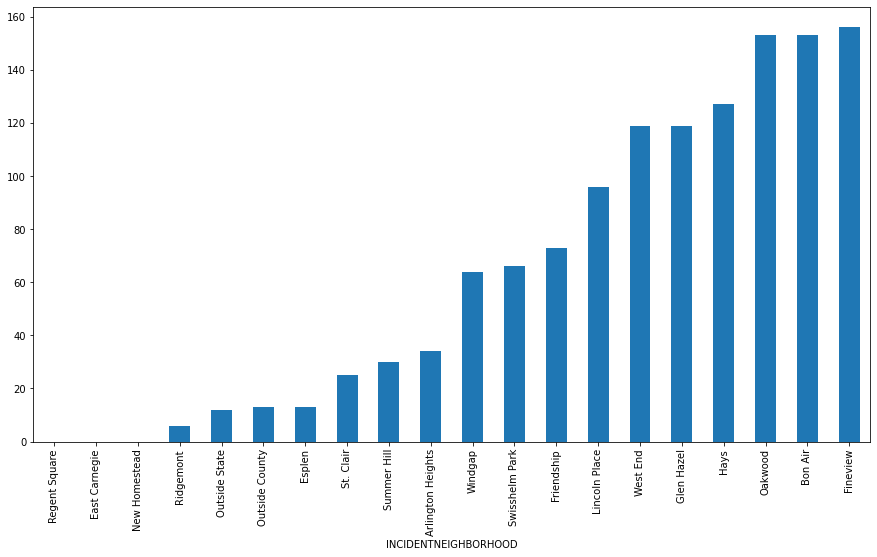

In [22]:
# plot the rank data
rank = rank.head(20)
rank.plot.bar(figsize = (15, 8))

In [23]:
# The top 20 safest neighborhoods
rank

INCIDENTNEIGHBORHOOD
Regent Square          0
East Carnegie          0
New Homestead          0
Ridgemont              6
Outside State         12
Outside County        13
Esplen                13
St. Clair             25
Summer Hill           30
Arlington Heights     34
Windgap               64
Swisshelm Park        66
Friendship            73
Lincoln Place         96
West End             119
Glen Hazel           119
Hays                 127
Oakwood              153
Bon Air              153
Fineview             156
Name: HIERARCHY, dtype: int64

## Conclusion

The data driven determination of “best neighborhood” is different from my personal favorite neighborhoods. I honestly haven not been to any of the places listed above or have been to but didn't recognize some of them. As I spend most of my time on campus and the in neighborhood I live in, I would say central oakland is safe for me, as a place with a high flow of people everyday. I believe Squirrel Hill is also relatively safe. On the other hand, the safe neighborhoods listed above are safe could be because the population there is relatively small.